<h1 style="color:blue;text-align:center">  Web Crawling with python: part 2</h1>
<h3 style="color:blue;text-align:center"> Chih-Hung Lai   </h3>
<h4 style="color:blue;text-align:center"> Created: 2017  &emsp; Last modified: 2022.04.20 </h4>

# Content of Table  

1. Retrieve data in different ways  
 1.1 Retrieve data from CSS  
 1.2 Retrieve Relatively related HTML elements  
 1.3 Retrieve specific structures
2. Regular expression  
3. Save data  
 3.1 Save text files  
 3.2 Save image files  
4. Modify HTML elements  
5. Special issues on get and post  
 5.1 Reauests.get method    
     5.1.1 params parament  
     5.1.2 User-agent  
     5.1.3 Pass account and password  
     5.1.4 Time issue  
     5.1.5 Cookie  
 5.2 Requests.post method  
6. Examples  
7. Goverment Open data in Taiwan

<a name = "BeautifulSoup"><h1 style="color:blue"> 1. Retrieve data in different ways

In [1]:
html_doc1 ="""<!DOCTYPE html>
<html">
 <head>
  <meta charset="utf-8"/>
  <title>Test my webpage</title>
 </head>
 <body>
  <!-- Surveys -->
  <div class="surveys" id="surveys">
   <div class="survey" id="q1">
    <p class="question">
      <a href="http://example.com/q1">Gender?</a></p>
    <ul class="answer">
     <li class="response">Male - 
       <span class="score selected">20</span></li>
     <li class="response">Female - 
       <span class="score">10</span></li>
    </ul>
   </div>
   <div class="survey" id="q2">
    <p class="question">
      <a href="http://example.com/q2">Do you like the website?</a></p>
    <ul class="answer">
     <li class="response">Like - 
       <span class="score">40</span></li>
     <li class="response">Normal - 
       <span class="score selected">20</span></li>
     <li class="response">Dislike - 
       <span class="score">0</span></li>
    </ul>
   </div>
   <div class="survey" id="q3">
    <p class="question">
      <a href="http://example.com/q3">Can you design web crawlers?</a></p>
    <ul class="answer">
     <li class="response">Yes - 
       <span class="score selected">34</span></li>
     <li class="response">No - 
       <span class="score">6</span></li>
    </ul>
   </div>
  </div>
  <div class="emails" id="emails">
    <div class="question">Email list: </div>
    abc@example.com
    <div class="survey" data-custom="important">def@example.com</div>
    <span class="survey" id="email">ghi@example.com</div>
  </div>
 </body>
</html>
"""

In [2]:
html_doc2 ="""<!DOCTYPE html>
<html lang="big5">
 <head>
   <title>Test my webpage</title>
 </head>
 <body>
  <!-- Surveys -->
  <div class="surveys" id="surveys">
   <div class="survey" id="q1">
    <p class="question">
      <a href="http://example.com/q1">Gender?</a></p>
    <ul class="answer">
     <li class="response">Male - 
       <span class="score selected">20</span></li>
     <li class="response">Female - 
       <span class="score">10</span></li>
    </ul>
   </div>
   <div class="survey" id="q2">
    <p class="question">
      <a href="http://example.com/q2">Do you like the website?</a></p>
   </div>
 </body>
</html>
"""

## 1.1 Retrieve data from CSS

* select_one()
    - Run a CSS selector against a parsed document and return the first matching element
    - Be like find( ) method
* select()
    - Run a CSS selector against a parsed document and return all the matching elements.
    - Be like find_all( ) method
    
    
* select_one( ) & select( ) are commonly used to get selecters, like HTML tags, ids, and classes.
 * HTML tag: 
   * .select('tag_name')
     * sp.select('div')
 * id
   * .select('#id_name)
     * sp.select('#link1')
 * class
   * .select('.class_name')
     * sp.select('.class1')
   
* https://www.crummy.com/software/BeautifulSoup/bs4/doc/#css-selectors

In [10]:
import requests
from bs4 import BeautifulSoup
sp = BeautifulSoup(html_doc1, 'lxml')
data1=sp.select("a")             # all tag a
print('data1:\n', data1) 
print("\ndata1[0]['href'] ->\n", data1[0]['href'])
print('\ndata1[0].get("href") ->\n', data1[0].get('href'))

data2=sp.select_one(".question")  # class "question"
print("\ndata2->\n", data2)

data3=sp.select("#q2")        #  id "q2"
print('\ndata3->\n', data3) 

data1:
 [<a href="http://example.com/q1">Gender?</a>, <a href="http://example.com/q2">Do you like the website?</a>, <a href="http://example.com/q3">Can you design web crawlers?</a>]

data1[0]['href'] ->
 http://example.com/q1

data1[0].get("href") ->
 http://example.com/q1

data2->
 <p class="question">
<a href="http://example.com/q1">Gender?</a></p>

data3->
 [<div class="survey" id="q2">
<p class="question">
<a href="http://example.com/q2">Do you like the website?</a></p>
<ul class="answer">
<li class="response">Like - 
       <span class="score">40</span></li>
<li class="response">Normal - 
       <span class="score selected">20</span></li>
<li class="response">Dislike - 
       <span class="score">0</span></li>
</ul>
</div>]


In [4]:
my_html = """
<!doctype html>
<html>
<head>
   <meta charset="utf-8">
   <title>Test HTML</title>
   <style>
      h1#author { width:400px; height:50px; text-align:center;
	     background:linear-gradient(to right,yellow,green);
      }
	  h1#content { width:400px; height:50px;
		 background:linear-gradient(to right,yellow,red); 
      }
      section { background:linear-gradient(to right bottom,yellow,gray); }
   </style>
</head>
<body>
<h1 id="author"> Richard</h1>
<img src="hung.jpg" width="100">
<section>
   <h1 id="content">Book Name</h1>
   <p>2015/2016<strong>Author </strong>English</p>
   <img src="travel.jpg" width="300">
</section>
<section>
   <h1 id="content">HTML5+CSS3</h1>
   <p>Introduction to HTML5+CSS3</p>
   <img src="html5.jpg" width="300">
</section>
</body>
</html>
"""

In [13]:
from bs4 import BeautifulSoup

# htmlFile = myhtml.html', encoding='utf-8')
objSoup = BeautifulSoup(my_html, 'lxml')
objTag = objSoup.select('#author')
print("Data type:", type(objTag))         
print("Length:", len(objTag))          
print("Data type of the first element:", type(objTag[0]))      
print("Content of the first tag:", objTag[0].getText()) 


Data type: <class 'bs4.element.ResultSet'>
Length: 1
Data type of the first element: <class 'bs4.element.Tag'>
Content of the first tag:  Richard


In [6]:
import bs4

objSoup = bs4.BeautifulSoup(my_html, 'lxml')
pObjTag = objSoup.select('p')
print("Len:", len(pObjTag))
print()
for pObj in pObjTag:
    print(str(pObj))             
    print(pObj.getText())         
    print(pObj.text)
    print()

Len: 2

<p>2015/2016<strong>Author </strong>English</p>
2015/2016Author English
2015/2016Author English

<p>Introduction to HTML5+CSS3</p>
Introduction to HTML5+CSS3
Introduction to HTML5+CSS3



### Select('selector':nth-of-type(n)'
- Matches elements based on their position among siblings of the same type (tag name)
- Select the forth "div" tag
    - select('div:nth-of-type(4)') 
- Select the second "ul" tag
    - select('ul > li:nth-of-type(2)')

In [7]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_doc1, "lxml")

div = soup.find("div")
print(div)

<div class="surveys" id="surveys">
<div class="survey" id="q1">
<p class="question">
<a href="http://example.com/q1">Gender?</a></p>
<ul class="answer">
<li class="response">Male - 
       <span class="score selected">20</span></li>
<li class="response">Female - 
       <span class="score">10</span></li>
</ul>
</div>
<div class="survey" id="q2">
<p class="question">
<a href="http://example.com/q2">Do you like the website?</a></p>
<ul class="answer">
<li class="response">Like - 
       <span class="score">40</span></li>
<li class="response">Normal - 
       <span class="score selected">20</span></li>
<li class="response">Dislike - 
       <span class="score">0</span></li>
</ul>
</div>
<div class="survey" id="q3">
<p class="question">
<a href="http://example.com/q3">Can you design web crawlers?</a></p>
<ul class="answer">
<li class="response">Yes - 
       <span class="score selected">34</span></li>
<li class="response">No - 
       <span class="score">6</span></li>
</ul>
</div>
</div>


In [18]:
tag_div1 = div.select("div:nth-of-type(1)")
print(tag_div1)

[<div class="survey" id="q1">
<p class="question">
<a href="http://example.com/q1">Gender?</a></p>
<ul class="answer">
<li class="response">Male - 
       <span class="score selected">20</span></li>
<li class="response">Female - 
       <span class="score">10</span></li>
</ul>
</div>]


In [10]:
tag_div3 = div.select("div:nth-of-type(3)")
print(tag_div3)

[<div class="survey" id="q3">
<p class="question">
<a href="http://example.com/q3">Can you design web crawlers?</a></p>
<ul class="answer">
<li class="response">Yes - 
       <span class="score selected">34</span></li>
<li class="response">No - 
       <span class="score">6</span></li>
</ul>
</div>]


### CSS combinators in a selector

- A CSS selector can contain more than one simple selector. Between the simple selectors, we can include a combinator.

#### There are four different combinators in CSS:

- Descendant selector (space)
    - The descendant selector matches all elements that are descendants of a specified element.
    - Select all "a" elements inside "div" elements:
        - select('div a')
    - Select all elements inside "div" elements:
        - select('div *')
    
- Child selector (>)
    - The child selector selects all elements that are the children of a specified element.
    - Selects all "p" elements that are children of a "div" element
        - select('p > a')
    - Selects all "email" classes that are children of a "div" element
        - select('div > .email)

- Adjacent sibling selector (+)
    - The adjacent sibling selector is used to select an element that is directly after another specific element.
    - Sibling elements must have the same parent element, and "adjacent" means "immediately following".
    - selects the first "email" class that are placed immediately after "div" elements:
        - select('div + .email')
       
- General sibling selector (~)
    - The general sibling selector selects all elements that are next siblings of a specified element.
    - Selects all "email" classes that are next siblings of "div" elements: 
        - select('div ~ .email')
        
        
- https://www.w3schools.com/css/css_combinators.asp

In [11]:
my_html = """
<!doctype html>
<html>
<head>
   <meta charset="utf-8">
   <title>Test HTML</title>
   <style>
      h1#author { width:400px; height:50px; text-align:center;
	     background:linear-gradient(to right,yellow,green);
      }
	  h1#content { width:400px; height:50px;
		 background:linear-gradient(to right,yellow,red); 
      }
      section { background:linear-gradient(to right bottom,yellow,gray); }
   </style>
</head>
<body>
<h1 id="author"> Richard</h1>
<img src="hung.jpg" width="100">
<section>
   <h1 id="content1">Book Name</h1>
   <p>2015/2016<strong>Author </strong>English</p>
   <img src="travel.jpg" width="300">
</section>
<section>
   <h1 id="content2">HTML5+CSS3</h1>
   <p>Introduction to HTML5+CSS3</p>
   <img src="html5.jpg" width="300">
</section>
</body>
</html>
"""

In [12]:
# Descendant selector (space)

from bs4 import BeautifulSoup

soup = BeautifulSoup(my_html, "lxml")

tag_title = soup.select("html head title")
print(tag_title[0].string)    
tag_a = soup.select("body p strong")
print(tag_a)


Test HTML
[<strong>Author </strong>]


In [13]:
html_doc1 ="""<!DOCTYPE html>
<html">
 <head>
  <meta charset="utf-8"/>
  <title>Test my webpage</title>
 </head>
 <body>
  <!-- Surveys -->
  <div class="surveys" id="surveys">
   <div class="survey" id="q1">
    <p class="question">
      <a href="http://example.com/q1">Gender?</a></p>
    <ul class="answer">
     <li class="response">Male - 
       <span class="score selected">20</span></li>
     <li class="response">Female - 
       <span class="score">10</span></li>
    </ul>
   </div>
   <div class="survey" id="q2">
    <p class="question">
      <a href="http://example.com/q2">Do you like the website?</a></p>
    <ul class="answer">
     <li class="response">Like - 
       <span class="score">40</span></li>
     <li class="response">Normal - 
       <span class="score selected">20</span></li>
     <li class="response">Dislike - 
       <span class="score">0</span></li>
    </ul>
   </div>
   <div class="survey" id="q3">
    <p class="question">
      <a href="http://example.com/q3">Can you design web crawlers?</a></p>
    <ul class="answer">
     <li class="response">Yes - 
       <span class="score selected">34</span></li>
     <li class="response">No - 
       <span class="score">6</span></li>
    </ul>
   </div>
  </div>
  <div class="emails" id="emails">
    <div class="question">Email list: </div>
    abc@example.com
    <div class="survey" data-custom="important">def@example.com</div>
    <span class="survey" id="email">ghi@example.com</div>
  </div>
 </body>
</html>
"""

In [14]:
# Child selector (>)

from bs4 import BeautifulSoup

soup = BeautifulSoup(html_doc1, "lxml")
tag_a = soup.select("p > a")
print(tag_a) 
print()
tag_li = soup.select("ul > li:nth-of-type(2)")
print(tag_li)
print()
tag_span = soup.select("div > #email")
print(tag_span)  


[<a href="http://example.com/q1">Gender?</a>, <a href="http://example.com/q2">Do you like the website?</a>, <a href="http://example.com/q3">Can you design web crawlers?</a>]

[<li class="response">Female - 
       <span class="score">10</span></li>, <li class="response">Normal - 
       <span class="score selected">20</span></li>, <li class="response">No - 
       <span class="score">6</span></li>]

[<span class="survey" id="email">ghi@example.com</span>]


In [19]:
my_html = """
<!doctype html>
<html>
<head>
   <meta charset="utf-8">
   <title>Test HTML</title>
   <style>
      h1#author { width:400px; height:50px; text-align:center;
	     background:linear-gradient(to right,yellow,green);
      }
	  h1#content { width:400px; height:50px;
		 background:linear-gradient(to right,yellow,red); 
      }
      section { background:linear-gradient(to right bottom,yellow,gray); }
   </style>
</head>
<body>
<h1 id="author"> Richard</h1>
<img src="hung.jpg" width="100">
<section>
   <h1 id="content1">Book Name</h1>
   <p>2015/2016<strong>Author </strong>English</p>
   <img src="travel.jpg" width="300">
</section>
<section>
   <h1 id="content2">HTML5+CSS3</h1>
   <p>Introduction to HTML5+CSS3</p>
   <img src="html5.jpg" width="300">
</section>
</body>
</html>
"""

In [20]:
# Child selector (>)

from bs4 import BeautifulSoup

soup = BeautifulSoup(my_html, "lxml")
tag = soup.select("section > *")
print(tag) 


[<h1 id="content1">Book Name</h1>, <p>2015/2016<strong>Author </strong>English</p>, <img src="travel.jpg" width="300"/>, <h1 id="content2">HTML5+CSS3</h1>, <p>Introduction to HTML5+CSS3</p>, <img src="html5.jpg" width="300"/>]


In [21]:
html_doc2 ="""<!DOCTYPE html>
<html lang="big5">
 <head>
   <title>Test my webpage</title>
 </head>
 <body>
  <!-- Surveys -->
  <div class="surveys" id="surveys">
   <div class="survey" id="q1">
    <p class="question">
      <a href="http://example.com/q1">Gender?</a></p>
    <ul class="answer">
     <li class="response">Male - 
       <span class="score selected">20</span></li>
     <li class="response">Female - 
       <span class="score">10</span></li>
    </ul>
    <ul class="answer">
     <li class="response">Elementary - 
       <span class="score selected">30</span></li>
     <li class="response">Advanced - 
       <span class="score">20</span></li>
    </ul>
   </div>
   <div class="survey" id="q2">
    <p class="question">
      <a href="http://example.com/q2">Do you like the website?</a></p>
   </div>
 </body>
</html>
"""

In [22]:
# Adjacent sibling selector (+)
# Return the first element

from bs4 import BeautifulSoup

soup = BeautifulSoup(html_doc2, "lxml")

print(soup.select("p + ul"))

[<ul class="answer">
<li class="response">Male - 
       <span class="score selected">20</span></li>
<li class="response">Female - 
       <span class="score">10</span></li>
</ul>]


In [19]:
# General sibling selector (~)
# Return all elements

from bs4 import BeautifulSoup

soup = BeautifulSoup(html_doc2, "lxml")

print(soup.select("p ~ ul"))


[<ul class="answer">
<li class="response">Male - 
       <span class="score selected">20</span></li>
<li class="response">Female - 
       <span class="score">10</span></li>
</ul>, <ul class="answer">
<li class="response">Elementary - 
       <span class="score selected">30</span></li>
<li class="response">Advanced - 
       <span class="score">20</span></li>
</ul>]


In [20]:
doc1 = '''
<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <title>Test my webpage</title>
 </head>
 <body>
  <!-- Surveys -->
  <div class="surveys" id="surveys">
   <div class="survey" id="q1">
    <p class="question">
      <a href="http://example.com/q1">Gender?</a></p>
    <ul class="answer">
     <li class="response">Male - 
       <span class="score selected">20</span></li>
     <li class="response">Female - 
       <span class="score">10</span></li>
    </ul>
   </div>
   <div class="survey" id="q2">
    <p class="question">
      <a href="http://example.com/q2">Do you like the website?</a></p>
    <ul class="answer">
     <li class="response">Like - 
       <span class="score">40</span></li>
     <li class="response">Normal - 
       <span class="score selected">20</span></li>
     <li class="response">Dislike - 
       <span class="score">0</span></li>
    </ul>
   </div>
   <div class="survey" id="q3">
    <p class="question">
      <a href="http://example.com/q3">Can you design web crawlers?</a></p>
    <ul class="answer">
     <li class="response">Yes - 
       <span class="score selected">34</span></li>
     <li class="response">No - 
       <span class="score">6</span></li>
    </ul>
   </div>
  </div>
  <div class="emails" id="emails">
    <div class="question">Email list: </div>
    abc@example.com
    <div class="survey" data-custom="important">def@example.com</div>
    <span class="survey" id="email">ghi@example.com</div>
  </div>
 </body>
</html>
'''

### Multiple tags

In [21]:
# Multiple tags

from bs4 import BeautifulSoup

soup = BeautifulSoup(doc1, "lxml")

tag = soup.select("#q1, #q2")  # Multiple tags using OR operation
for item in tag:
    print(item.p.a.string)


Gender?
Do you like the website?


### Combine tag and attribute
- cannot have space between the tag and the attribute

In [22]:
tag = soup.select("a[href]")
print(tag)
print()
tag = soup.select("a[href='http://example.com/q2']")
print(tag)

[<a href="http://example.com/q1">Gender?</a>, <a href="http://example.com/q2">Do you like the website?</a>, <a href="http://example.com/q3">Can you design web crawlers?</a>]

[<a href="http://example.com/q2">Do you like the website?</a>]


### Attributes & special characters

In [23]:
tag = soup.select("[class=score]")
print(tag)
print('------------')
for item in tag:
    print(item.string)



[<span class="score">10</span>, <span class="score">40</span>, <span class="score">0</span>, <span class="score">6</span>]
------------
10
40
0
6


In [24]:
# special characters ~ $ ^ *

tag = soup.select("[class~=score]")  # match the end or the start of the string
print(tag)

print('------------')
tag = soup.select("[class$=score]")  # match the end of the string
print(tag)
    
print('------------')
tag = soup.select("[class^=score]")     # match the start of the string
print(tag)
    
print('------------')
tag = soup.select("[class*=core]")     # match any word of the string
print(tag)

[<span class="score selected">20</span>, <span class="score">10</span>, <span class="score">40</span>, <span class="score selected">20</span>, <span class="score">0</span>, <span class="score selected">34</span>, <span class="score">6</span>]
------------
[<span class="score">10</span>, <span class="score">40</span>, <span class="score">0</span>, <span class="score">6</span>]
------------
[<span class="score selected">20</span>, <span class="score">10</span>, <span class="score">40</span>, <span class="score selected">20</span>, <span class="score">0</span>, <span class="score selected">34</span>, <span class="score">6</span>]
------------
[<span class="score selected">20</span>, <span class="score">10</span>, <span class="score">40</span>, <span class="score selected">20</span>, <span class="score">0</span>, <span class="score selected">34</span>, <span class="score">6</span>]


In [25]:
tag = soup.select("[class~=selected]")  # match the end or the start of the string
print(tag)

print('------------')
tag = soup.select("[class$=selected]")  # match the end of the string
print(tag)
    
print('------------')
tag = soup.select("[class^=selected]")     # match the start of the string
print(tag)
    
print('------------')
tag = soup.select("[class*=selected]")     # match any word of the string
print(tag)

[<span class="score selected">20</span>, <span class="score selected">20</span>, <span class="score selected">34</span>]
------------
[<span class="score selected">20</span>, <span class="score selected">20</span>, <span class="score selected">34</span>]
------------
[]
------------
[<span class="score selected">20</span>, <span class="score selected">20</span>, <span class="score selected">34</span>]


## 1.2 Retrieve Relatively related HTML elements 

- find_next_sibling()       # find the next sibling matching the paramters
    - find_previous_siblings(name, attrs, string, limit, **kwargs)
    - The following method's parameters are the same 
- find_previous_sibling()   # find the previous sibling
- find_next_siblings()      # find all next siblings
- find_previous_siblings()  # find all previous siblings
- find_parent()
- find_parents()
- .parent                  

In [26]:
doc11 = '''

    <p class="question">
      <a href="http://example.com/q2">Do you like the website?</a></p>
    <ul class="answer">
     <li class="response">Like - 
       <span class="score">40</span></li>
     <li class="response">Normal - 
       <span class="score selected">20</span></li>
     <li class="response">Dislike - 
       <span class="score">0</span></li>
    </ul>
  
'''

In [27]:
import requests, bs4       
objSoup = bs4.BeautifulSoup(doc11, 'lxml')

data1 = objSoup.find(class_='response')
print(data1)

print('\nnext_sibling()->', data1.find_next_sibling())
print('\nnext_siblings()->', data1.find_next_siblings())
print()
print('\n', data1.parent)
print()
print('\n', data1.parent.find_previous_sibling())

<li class="response">Like - 
       <span class="score">40</span></li>

next_sibling()-> <li class="response">Normal - 
       <span class="score selected">20</span></li>

next_siblings()-> [<li class="response">Normal - 
       <span class="score selected">20</span></li>, <li class="response">Dislike - 
       <span class="score">0</span></li>]


 <ul class="answer">
<li class="response">Like - 
       <span class="score">40</span></li>
<li class="response">Normal - 
       <span class="score selected">20</span></li>
<li class="response">Dislike - 
       <span class="score">0</span></li>
</ul>


 <p class="question">
<a href="http://example.com/q2">Do you like the website?</a></p>


## 1.3 Retrieve specific structures

- List of items
- List of custom items
- Table

In [28]:
doc11 = '''
    <p class="question">
      <a href="http://example.com/q2">Do you like the website?</a></p>
    <ul class="answer">
     <li class="response">Like - 
       <span class="score">40</span></li>
     <li class="response">Normal - 
       <span class="score selected">20</span></li>
     <li class="response">Dislike - 
       <span class="score">0</span></li>
    </ul>
'''

In [29]:
# Retrieve list of items

import requests, bs4

soup = bs4.BeautifulSoup(doc11, 'lxml')
titleobj = soup.find(class_='question')               # h2標題
print(titleobj.text)

itemobj = soup.find('ul')          # type='I'
items = itemobj.find_all('li')
for item in items:               
    print(item.text)


Do you like the website?
Like - 
       40
Normal - 
       20
Dislike - 
       0


In [30]:
capital = '''
<!doctype html>
<html>
<head>
   <meta charset="utf-8">
   <title>Capital</title> 
</head>
<body>
<h2>List of capitals</h2>
<dl>
   <dt>Washington</dt>
      <dd>America</dd>
   <dt>Tokyo</dt>
      <dd>Japan</dd>
   <dt>Paris</dt>
      <dd>France</dd>
</dl>
</body>
</html>
'''

<!doctype html>
<html>
<head>
   <meta charset="utf-8">
   <title>Capital</title> 
</head>
<body>
<h2>List of capitals</h2>
<dl>
   <dt>Washington</dt>
      <dd>America</dd>
   <dt>Tokyo</dt>
      <dd>Japan</dd>
   <dt>Paris</dt>
      <dd>France</dd>
</dl>
</body>
</html>


In [31]:
# Retrieve list of custom items

import requests, bs4
             
objSoup = bs4.BeautifulSoup(capital, 'lxml')

mycity = []
cityobj = objSoup.find('dl')          
cities = cityobj.find_all('dt')
for city in cities:
    mycity.append(city.text)                

mycountry = []    
countryobj = objSoup.find('dl')
countries = countryobj.find_all('dd')
for country in countries:
    mycountry.append(country.text)          

print("Countries = ", mycountry)
print("Capitals = ", mycity)
data = dict(zip(mycountry, mycity))
print(data)                                 

Countries =  ['America', 'Japan', 'France']
Capitals =  ['Washington', 'Tokyo', 'Paris']
{'America': 'Washington', 'Japan': 'Tokyo', 'France': 'Paris'}


In [25]:
my_table = '''
<!doctype html>
<html>
<head>
   <meta charset="utf-8">
   <title>Table</title> 
</head>
<body>
<table border="1">
   <thead><!--Table head -->
      <tr><th colspan="3">Cell phones</th></tr>
      <tr><th>Brand</th><th>Company</th><th>Place</th></tr>
   </thead>
   <tbody>
      <tr><td>Butterfly</td><td>HTC</td><td>Taiwan</td></tr>
      <tr><td>iphone</td><td>Apple</td><td>US</td></tr>
      <tr><td>Galaxy</td><td>Samsung</td><td>South Korea</td></tr>
   </tbody>
   <tfoot><!-- Footer -->
      <tr><td colspan="3">Creation: 2022.3.30</td></tr>
   </tfoot>
</table>
</body>
</html>
'''

<!doctype html>
<html>
<head>
   <meta charset="utf-8">
   <title>Table</title> 
</head>
<body>
<table border="1">
   <thead><!--Table head -->
      <tr><th colspan="3">Cell phones</th></tr>
      <tr><th>Brand</th><th>Company</th><th>Place</th></tr>
   </thead>
   <tbody>
      <tr><td>Butterfly</td><td>HTC</td><td>Taiwan</td></tr>
      <tr><td>iphone</td><td>Apple</td><td>US</td></tr>
      <tr><td>Galaxy</td><td>Samsung</td><td>South Korea</td></tr>
   </tbody>
   <tfoot><!-- Footer -->
      <tr><td colspan="3">Creation: 2022.3.30</td></tr>
   </tfoot>
</table>
</body>
</html>

In [26]:
import requests, bs4       
objSoup = bs4.BeautifulSoup(my_table, 'lxml')

brand = []                       
tableobj = objSoup.find('table').find('tbody')
tables = tableobj.find_all('tr')
for table in tables:
    b = table.find('td')
    brand.append(b.text)

company = []                   
for table in tables:
    comps = table.find_all('td')
    comp = comps[1]
    company.append(comp.text)
    
print("Brand = ", brand)
print("Company = ", company)
data = dict(zip(brand, company))
print(data)                         


Brand =  ['Butterfly', 'iphone', 'Galaxy']
Company =  ['HTC', 'Apple', 'Samsung']
{'Butterfly': 'HTC', 'iphone': 'Apple', 'Galaxy': 'Samsung'}


# 2. Regular expression

#### https://www.tutorialspoint.com/python3/python_reg_expressions.htm
https://docs.python.org/3.6/library/re.html?highlight=regular%20expression

### Definition
- A regular expression is a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern.

### Example

In [ ]:
import re
pat = re.compile('[a-z]+') # 1 or more repetitions of English letters

m = pat.findall('tem12po')
print(m)  # ['tem', 'po']


In [27]:
# find all email addree

import requests,re
regex = re.compile('[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+')
url = 'https://www.csie.ndhu.edu.tw/professors-zh_tw/'
html = requests.get(url)
emails = regex.findall(html.text)
for email in emails:
    print(email)

ICChang@gms.ndhu.edu.tw
ICChang@gms.ndhu.edu.tw
david@gms.ndhu.edu.tw
david@gms.ndhu.edu.tw
ccchiang@gms.ndhu.edu.tw
ccchiang@gms.ndhu.edu.tw
chtsai@gms.ndhu.edu.tw
chtsai@gms.ndhu.edu.tw
wychang@gms.ndhu.edu.tw
wychang@gms.ndhu.edu.tw
showyang@gms.ndhu.edu.tw
showyang@gms.ndhu.edu.tw
cjhuang@gms.ndhu.edu.tw
cjhuang@gms.ndhu.edu.tw
scchou@gms.ndhu.edu.tw
scchou@gms.ndhu.edu.tw
cnyang@gms.ndhu.edu.tw
cnyang@gms.ndhu.edu.tw
sjyen@gms.ndhu.edu.tw
sjyen@gms.ndhu.edu.tw
mtyang@gms.ndhu.edu.tw
mtyang@gms.ndhu.edu.tw
teresak@gms.ndhu.edu.tw
teresak@gms.ndhu.edu.tw
baolein@gms.ndhu.edu.tw
baolein@gms.ndhu.edu.tw
hcchi@gms.ndhu.edu.tw
hcchi@gms.ndhu.edu.tw
guanling@gms.ndhu.edu.tw
guanling@gms.ndhu.edu.tw
sclo@gms.ndhu.edu.tw
sclo@gms.ndhu.edu.tw
mxchen@gms.ndhu.edu.tw
mxchen@gms.ndhu.edu.tw
laich@gms.ndhu.edu.tw
laich@gms.ndhu.edu.tw
tkchang@gms.ndhu.edu.tw
tkchang@gms.ndhu.edu.tw
yung@gms.ndhu.edu.tw
yung@gms.ndhu.edu.tw
wcc@gms.ndhu.edu.tw
wcc@gms.ndhu.edu.tw
wktai@gms.ndhu.edu.tw
wktai@gms.

### Test website
[pythex](https://pythex.org/)

### Special characters

\	escape special characters  
.	matches any character  
^	matches beginning of string  
$	matches end of string  
[5b-d]	matches any chars '5', 'b', 'c' or 'd'  
[^a-c6]	matches any char except 'a', 'b', 'c' or '6'  
R|S	matches either regex R or regex S  
()	creates a capture group and indicates precedence  

In [ ]:
### Quantifiers

*	0 or more (append ? for non-greedy)  
+	1 or more (append ? for non-greedy)  
?	0 or 1 (append ? for non-greedy)  
{m}	exactly mm occurrences  
{m, n}	from m to n. m defaults to 0, n to infinity  
{m, n}?	from m to n, as few as possible  

### Special sequences

\A	start of string  
\b	matches empty string at word boundary (between \w and \W)  
\B	matches empty string not at word boundary  
\d	digit  
\D	non-digit  
\s	whitespace: [ \t\n\r\f\v]  
\S	non-whitespace  
\w	alphanumeric: [0-9a-zA-Z_]  
\W	non-alphanumeric  
\Z	end of string  
\g<id>	matches a previously defined group

### Special sequences

(?iLmsux)	matches empty string, sets re.X flags  
(?:...)	non-capturing version of regular parentheses  
(?P...)	matches whatever matched previously named group  
(?P=)	digit  
(?#...)	a comment; ignored  
(?=...)	lookahead assertion: matches without consuming  
(?!...)	negative lookahead assertion  
(?<=...)	lookbehind assertion: matches if preceded   
(?<!...)	negative lookbehind assertion  
(?(id)yes|no)	match 'yes' if group 'id' matched, else 'no'

### Common patterns
<pre>
. digits: 1~9
  [1-9] 

. 0 or more decimal digit [0-9]
  \d* 

. Birthday
  ^\d{4}-\d{2}-\d{2}$       
  emample："1996-08-06"  
  
. Taiwanese ID
  ^[A-Z]\d{9}$
  example："A123456789"
  
. cell phone number
  ^09\d{8}$		
  example："0912345678"
  
. gmail address
  ^.*@gmail\.com$		
  emample："test@gmail.com"
  
. email address 
  ^\w+((-\w+)|(\.\w+))*\@[A-Za-z0-9]+((\.|-)[A-Za-z0-9]+)*\.[A-Za-z0-9]+$
  
. Arithmetic
  ^[0-9\+\-\*\/]*$	
  example："1+2*3"

. Price: 0 or positive integer
  /^(0|[1-9]\d*)$/
  
. URL
  ((http[s]{0,1}|ftp):\/\/[a-zA-Z0-9\.\-]+\.([a-zA-Z]{2,4})(:\d+)?(\/[a-zA-Z0-9\.\-~!@#$%^&amp;*+?:_\/=<>]*)?)/g
OR
  ((http[s]{0,1}|ftp):\/\/[a-zA-Z0-9\.\-\_\/]+\.([a-zA-Z]{2,4})(:\d+)?(\/[a-zA-Z0-9\.\-~!@#$%^&amp;*+?:_\/=<>]*)?)
 
</pre>

* import re
*  2 format2:
 1. xxx = re.method(regular_expression, target_string)  
    -eg. 1:  
    regex = r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)"  
    emails = re.findall(regex,target_string)  
    
    -eg. 2:  
    pat = re.compile('[a-z]+')   
    m = pat.search('3tem12po')
 2. xxx = regular_expression.method(target_string)  
    -eg. 1:
    regex = re.compile('[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+')  
    emails = regex.findall(target_string)
    
    -eg. 2:   
    regex = r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)"  
    html = requests.get(url).text  
    emails = re.findall(regex,html)

### method
- match( ) checks for a match only at the beginning of the string
- search() checks for a match anywhere in the string
- findall() matches all occurrences of a pattern

In [28]:
import re
pat = re.compile('[a-z]+') # 1 or more repetitions of English letters

m_search = pat.search('3tem12po')
m_match  = pat.match('3tem12po')
m_findall = pat.findall('3tem12po')

print(m_search)
print(m_match)
print(m_findall)

<re.Match object; span=(1, 4), match='tem'>
None
['tem', 'po']


In [ ]:
import re
pat = re.compile('[a-z]+') # 1 or more repetitions of English letters

m = pat.search('3tem12po')
print(m) # <_sre.SRE_Match object; span=(1, 4), match='tem'>

if not m==None:
    print(m.group())  # tem
    print(m.start())  # 1
    print(m.end())    # 4
    print(m.span())   # (1,4)

In [29]:
import re
pat = re.compile('[a-z]+')

m = pat.findall('tem12po')
print(m)  # ['tem', 'po']

['tem', 'po']


In [30]:
import bs4
import re

htmlFile = "<h1 class='boldtext'>test sentence</h1>"
objSoup = bs4.BeautifulSoup(htmlFile, 'lxml')
tag = objSoup.find('h1', class_=re.compile('text'))
print(tag)
print(tag.text)


<h1 class="boldtext">test sentence</h1>
test sentence


In [4]:
html_doc1 ="""<!DOCTYPE html>
<html">
 <head>
  <meta charset="utf-8"/>
  <title>Test my webpage</title>
 </head>
 <body>
  <!-- Surveys -->
  <div class="surveys" id="surveys">
   <div class="survey" id="q1">
    <p class="question">
      <a href="http://example.com/q1">Gender?</a></p>
    <ul class="answer">
     <li class="response1">Male - 
       <span class="score selected">20</span></li>
     <li class="response2">Female - 
       <span class="score">10</span></li>
    </ul>
   </div>
   <div class="survey" id="q2">
    <p class="question">
      <a href="http://example.com/q2">Do you like the website?</a></p>
    <ul class="answer">
     <li class="response">Like - 
       <span class="score">40</span></li>
     <li class="response">Normal - 
       <span class="score selected">20</span></li>
     <li class="response">Dislike - 
       <span class="score">0</span></li>
    </ul>
   </div>
   <div class="survey" id="q3">
    <p class="question">
      <a href="http://example.com/q3">Can you design web crawlers?</a></p>
    <ul class="answer">
     <li class="response">Yes - 
       <span class="score selected">34</span></li>
     <li class="response">No - 
       <span class="score">6</span></li>
    </ul>
   </div>
  </div>
  <div class="emails" id="emails">
    <div class="question">Email list: </div>
    abc@example.com
    <div class="survey" data-custom="important">def@example.com</div>
    <span class="survey" id="email">ghi@example.com</div>
  </div>
 </body>
</html>
"""

In [6]:
# find all classes starting with "score"

import re
from bs4 import BeautifulSoup
sp = BeautifulSoup(html_doc1,'lxml') 

# reg = re.compile('sister')
class_sister = sp.find_all(class_=re.compile('score')) # start with "score"

# print(sp)
print(class_sister)

[<span class="score selected">20</span>, <span class="score">10</span>, <span class="score">40</span>, <span class="score selected">20</span>, <span class="score">0</span>, <span class="score selected">34</span>, <span class="score">6</span>]


In [33]:
# find all email addree

import requests,re
regex = re.compile('[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+')
url = 'https://www.csie.ndhu.edu.tw/professors-zh_tw/'
html = requests.get(url)
emails = regex.findall(html.text)
for email in emails:
    print(email)

ICChang@gms.ndhu.edu.tw
ICChang@gms.ndhu.edu.tw
david@gms.ndhu.edu.tw
david@gms.ndhu.edu.tw
ccchiang@gms.ndhu.edu.tw
ccchiang@gms.ndhu.edu.tw
chtsai@gms.ndhu.edu.tw
chtsai@gms.ndhu.edu.tw
wychang@gms.ndhu.edu.tw
wychang@gms.ndhu.edu.tw
showyang@gms.ndhu.edu.tw
showyang@gms.ndhu.edu.tw
cjhuang@gms.ndhu.edu.tw
cjhuang@gms.ndhu.edu.tw
scchou@gms.ndhu.edu.tw
scchou@gms.ndhu.edu.tw
cnyang@gms.ndhu.edu.tw
cnyang@gms.ndhu.edu.tw
sjyen@gms.ndhu.edu.tw
sjyen@gms.ndhu.edu.tw
mtyang@gms.ndhu.edu.tw
mtyang@gms.ndhu.edu.tw
teresak@gms.ndhu.edu.tw
teresak@gms.ndhu.edu.tw
baolein@gms.ndhu.edu.tw
baolein@gms.ndhu.edu.tw
hcchi@gms.ndhu.edu.tw
hcchi@gms.ndhu.edu.tw
guanling@gms.ndhu.edu.tw
guanling@gms.ndhu.edu.tw
sclo@gms.ndhu.edu.tw
sclo@gms.ndhu.edu.tw
mxchen@gms.ndhu.edu.tw
mxchen@gms.ndhu.edu.tw
laich@gms.ndhu.edu.tw
laich@gms.ndhu.edu.tw
tkchang@gms.ndhu.edu.tw
tkchang@gms.ndhu.edu.tw
yung@gms.ndhu.edu.tw
yung@gms.ndhu.edu.tw
wcc@gms.ndhu.edu.tw
wcc@gms.ndhu.edu.tw
wktai@gms.ndhu.edu.tw
wktai@gms.

In [34]:
import requests, re

regex = r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)"
url = 'https://www.csie.ndhu.edu.tw/professors-zh_tw/'

html = requests.get(url).text

emails = re.findall(regex,html)
for email in emails:
    print(email)

ICChang@gms.ndhu.edu.tw
ICChang@gms.ndhu.edu.tw
david@gms.ndhu.edu.tw
david@gms.ndhu.edu.tw
ccchiang@gms.ndhu.edu.tw
ccchiang@gms.ndhu.edu.tw
chtsai@gms.ndhu.edu.tw
chtsai@gms.ndhu.edu.tw
wychang@gms.ndhu.edu.tw
wychang@gms.ndhu.edu.tw
showyang@gms.ndhu.edu.tw
showyang@gms.ndhu.edu.tw
cjhuang@gms.ndhu.edu.tw
cjhuang@gms.ndhu.edu.tw
scchou@gms.ndhu.edu.tw
scchou@gms.ndhu.edu.tw
cnyang@gms.ndhu.edu.tw
cnyang@gms.ndhu.edu.tw
sjyen@gms.ndhu.edu.tw
sjyen@gms.ndhu.edu.tw
mtyang@gms.ndhu.edu.tw
mtyang@gms.ndhu.edu.tw
teresak@gms.ndhu.edu.tw
teresak@gms.ndhu.edu.tw
baolein@gms.ndhu.edu.tw
baolein@gms.ndhu.edu.tw
hcchi@gms.ndhu.edu.tw
hcchi@gms.ndhu.edu.tw
guanling@gms.ndhu.edu.tw
guanling@gms.ndhu.edu.tw
sclo@gms.ndhu.edu.tw
sclo@gms.ndhu.edu.tw
mxchen@gms.ndhu.edu.tw
mxchen@gms.ndhu.edu.tw
laich@gms.ndhu.edu.tw
laich@gms.ndhu.edu.tw
tkchang@gms.ndhu.edu.tw
tkchang@gms.ndhu.edu.tw
yung@gms.ndhu.edu.tw
yung@gms.ndhu.edu.tw
wcc@gms.ndhu.edu.tw
wcc@gms.ndhu.edu.tw
wktai@gms.ndhu.edu.tw
wktai@gms.

# 3. Save files <a name = "Save_files">

## 3.1 Save text files

- Format 1:
    * fp = open('file_name','w')
    * fp.write(string)
    * fp.close()
- Format 2:
    - with open("file_name", "r", encoding="utf8") as fp: 

In [35]:
# Save a text file

import requests

r = requests.get("https://www.ndhu.edu.tw/?Lang=en")

fp = open("ndhu.html", "w", encoding="utf8")
fp.write(r.text)
print("writing to flag.html...")
fp.close()

writing to flag.html...


In [36]:
# Read a file

fp = open("ndhu.html", "r", encoding="utf8")
str = fp.read()
print("File content:")
print(str)

File content:
<!DOCTYPE html>
<html lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
<meta name="viewport" content="initial-scale=1.0, user-scalable=1, minimum-scale=1.0, maximum-scale=3.0">
<meta name="apple-mobile-web-app-capable" content="yes">
<meta name="apple-mobile-web-app-status-bar-style" content="black">
<meta name="keywords" content="National Dong Hwa University, NDHU, Dong Hwa, Taiwan, Hualien, Learning Chinese, Studying Chinese, Study Abroad, Computer Science, Physical" />
<meta name="description" content="National Dong Hwa University was founded in July 1994 with the planning stage started three years earlier. In October 1991, the National Dong Hwa University Planning Office was established in Shoufeng, Hualien, by the Ministry of Education as part of its mission to foster the balanced regional development of Taiwan through the even distribution of higher education system

In [37]:
# Read a file using "with open ..."

with open("ndhu.html", "r", encoding="utf8") as fp:
    str = fp.read()
    print("Content:\n")
    print(str)

Content:

<!DOCTYPE html>
<html lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
<meta name="viewport" content="initial-scale=1.0, user-scalable=1, minimum-scale=1.0, maximum-scale=3.0">
<meta name="apple-mobile-web-app-capable" content="yes">
<meta name="apple-mobile-web-app-status-bar-style" content="black">
<meta name="keywords" content="National Dong Hwa University, NDHU, Dong Hwa, Taiwan, Hualien, Learning Chinese, Studying Chinese, Study Abroad, Computer Science, Physical" />
<meta name="description" content="National Dong Hwa University was founded in July 1994 with the planning stage started three years earlier. In October 1991, the National Dong Hwa University Planning Office was established in Shoufeng, Hualien, by the Ministry of Education as part of its mission to foster the balanced regional development of Taiwan through the even distribution of higher education systems in

In [38]:
# read a file using readlines() method

with open("ndhu.html", "r", encoding="utf8") as fp:
    list1 = fp.readlines()
    for line in list1:
        print(line, end="")

<!DOCTYPE html>
<html lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
<meta name="viewport" content="initial-scale=1.0, user-scalable=1, minimum-scale=1.0, maximum-scale=3.0">
<meta name="apple-mobile-web-app-capable" content="yes">
<meta name="apple-mobile-web-app-status-bar-style" content="black">
<meta name="keywords" content="National Dong Hwa University, NDHU, Dong Hwa, Taiwan, Hualien, Learning Chinese, Studying Chinese, Study Abroad, Computer Science, Physical" />
<meta name="description" content="National Dong Hwa University was founded in July 1994 with the planning stage started three years earlier. In October 1991, the National Dong Hwa University Planning Office was established in Shoufeng, Hualien, by the Ministry of Education as part of its mission to foster the balanced regional development of Taiwan through the even distribution of higher education systems in the north

In [39]:
# Parse HTML

from bs4 import BeautifulSoup

with open("ndhu.html", "r", encoding="utf8") as fp:
    soup = BeautifulSoup(fp, "lxml")
    print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="initial-scale=1.0, user-scalable=1, minimum-scale=1.0, maximum-scale=3.0" name="viewport"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="black" name="apple-mobile-web-app-status-bar-style"/>
<meta content="National Dong Hwa University, NDHU, Dong Hwa, Taiwan, Hualien, Learning Chinese, Studying Chinese, Study Abroad, Computer Science, Physical" name="keywords"/>
<meta content="National Dong Hwa University was founded in July 1994 with the planning stage started three years earlier. In October 1991, the National Dong Hwa University Planning Office was established in Shoufeng, Hualien, by the Ministry of Education as part of its mission to foster the balanced regional development of Taiwan through the even distribution of higher education systems in the north, south, east and

## 3.2 Save image files

In [40]:
import requests

img_url = "https://www.ndhu.edu.tw/var/file/0/1000/img/8/LOGO_NDHU.png"
img_data = requests.get(img_url).content
with open('NDHU_logo.jpg', 'wb') as img:
    img.write(img_data)

In [7]:
from urllib.parse import urlparse

url = "https://www.google.com/search?q=w3schools+python&oq=&aqs=chrome.5.35i39i362l8.564582371j0j15&sourceid=chrome&ie=UTF-8"

print("schema:", urlparse(url).scheme)
print("hostname:", urlparse(url).hostname)
print("port:", urlparse(url).port)

print("{}://{}".format(urlparse(url).scheme, urlparse(url).hostname))

schema: https
hostname: www.google.com
port: None
https://www.google.com


In [ ]:
# download all images in a webpage

from bs4 import BeautifulSoup
import requests
import sys, os
from urllib.parse import urlparse
from urllib.request import urlopen

image_dir = 'download_images2'

url = input('URL:')

domain = "{}://{}".format(urlparse(url).scheme, urlparse(url).hostname)
html = requests.get(url).text
sp = BeautifulSoup(html, 'html.parser')
all_links = sp.find_all(['a','img'])

for link in all_links:
    src = link.get('src')
    href = link.get('href')
    targets = [src, href]
    for t in targets:
        if t != None and ('.jpg' in t or '.png' in t):
            if t.startswith('http'): full_path = t
            else:                    full_path = domain+t
            print(full_path)
            
#             image_dir = url.split('/')[-1]
            if not os.path.exists(image_dir): os.mkdir(image_dir)
            filename = full_path.split('/')[-1]
            ext = filename.split('.')[-1]
            filename = filename.split('.')[-2]
            if 'jpg' in ext: filename = filename + '.jpg'
            else:            filename = filename + '.png'
#             image = urlopen(full_path)                  # alternative way
            image = requests.get(full_path).content
            fp = open(os.path.join(image_dir,filename),'wb')
            fp.write(image)
            fp.close()

# 4. Modify HTML elements

In [41]:
# modify HTML tag name and attribute 

from bs4 import BeautifulSoup

soup = BeautifulSoup("<b class='score'>Joe</b>", "lxml")    
tag = soup.b
tag.name = "p"
tag["class"] = "question"
tag["id"] = "name"
print(tag)
del tag["class"]
print(tag)   

<p class="question" id="name">Joe</p>
<p id="name">Joe</p>


In [ ]:
# modify

from bs4 import BeautifulSoup

soup = BeautifulSoup("<b class='score'>Joe</b>", "lxml")    
tag = soup.b
tag.string = "Mary"
print(tag)
  

In [ ]:
# add HTML tag and content

from bs4 import BeautifulSoup
from bs4.element import NavigableString

soup = BeautifulSoup("<b></b>", "lxml")    
tag = soup.b
tag.append("Joe")
print(tag)
new_str = NavigableString(" Chen")
tag.append(new_str)
print(tag)
new_tag = soup.new_tag("a", href="http://www.example.com")
tag.append(new_tag)
print(tag)
  

In [ ]:
# insert and delete HTML tag

from bs4 import BeautifulSoup

soup = BeautifulSoup("<p><b>One</b></p>", "lxml")  
tag = soup.b  
new_tag = soup.new_tag("i")
new_tag.string = "Two"
tag.insert_before(new_tag)
print(soup.p)
new_string = soup.new_string("Three")
tag.insert_after(new_string)
print(soup.p)
tag.clear()
print(soup.p)
  

In [ ]:
# replace tag

from bs4 import BeautifulSoup

soup = BeautifulSoup("<p><b>One</b></p>", "lxml")  
tag = soup.b  
new_tag = soup.new_tag("i")
new_tag.string = "Two"
tag.replace_with(new_tag)
print(soup.p)
  

# 5. Special issues on get and post

### Website for testing get and post method


* http://httpbin.org

## 5.1 Paraments of get method

- Syntax
    - requests.get(url, params={key: value}, args)
 
- Parameters
 - params = dictionary           # HTTP request of RESTful API
     - requests.get(URL?para_1=value_1&para_2=value_2...)   # seperated by "&"
 - headers               # pass user-agent
 - auth = (account, password)
 - timeout               
 - cookies
 
- Further reference
 - https://www.w3schools.com/python/ref_requests_get.asp 

### 5.1.1 params parament

- requests.get(url, params = *dictionary*)
 - params = dictionary           # HTTP request of RESTful API
 - requests.get(URL?para_1=value_1&para_2=value_2...)   # seperated by "&"

In [8]:
# request.get() params

import requests

# method 1
html = requests.get("https://www.google.com.tw/search?q=5g&tbm=isch")

# method 2
data = {'q': '5g', 'tbm': 'isch'}
html = requests.get("https://www.google.com.tw/search?", params=data)

print(html.url)

https://www.google.com.tw/search?q=5g&tbm=isch


In [ ]:
import requests
payload = {'key1': 'value1', 'key2': 'value2'}

html = requests.get("http://httpbin.org/get", params=payload)
print(html.url) # http://httpbin.org/get?key1=value1&key2=value2

<!doctype html><html lang="zh-TW"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>5g AI - Google 搜尋</title><script nonce="svg_ZReqZr1jaaot3pwfTw">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};var h=
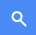

In [13]:
import requests

r = requests.get("https://www.google.com.tw/search?q=5g+AI")

print(r.text)

### 5.1.2 User-agent

- Simulate browser's headers
  
- Syntax
    - url_headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
    - r = requests.get(url, headers=url_headers)


In [14]:
import requests
url = 'http://httpbin.org/user-agent'
html = requests.get(url)
html.encoding="utf-8"
print(html.text)



{
  "user-agent": "python-requests/2.26.0"
}



In [31]:
# add browser's user-agent

url = "http://httpbin.org/user-agent"
r = requests.get(url)
print(r.text)
print("----------------------")
url_headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36 Edg/101.0.1210.32'}
r = requests.get(url, headers=url_headers)
print(r.text)


{
  "user-agent": "python-requests/2.26.0"
}

----------------------
{
  "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36 Edg/101.0.1210.32"
}



### 5.1.3 Pass account and password

requests.get(url, auth = (account, password))

In [ ]:
import requests

url = "https://api.github.com/user"

r = requests.get(url, auth=('hueyan@ms2.hinet.net', '********'))
if r.status_code == requests.codes.ok:
    print(r.headers['Content-Type'])
    print(r.json())
else:
    print("HTTP error...")

### 5.1.4 Time issue

In [19]:
# set connection time period

import requests

try:
    r = requests.get("http://www.google.com", timeout=0.03)
    print(r.text)
except requests.exceptions.Timeout as ex:
    print("Error: exceed requested time...\n" + str(ex))

Error: exceed requested time...
HTTPConnectionPool(host='www.google.com', port=80): Read timed out. (read timeout=0.03)


In [ ]:
import time
import requests

URL = "http://www.majortests.com/word-lists/word-list-0{0}.html"

for i in range(1, 10):
    url = URL.format(i) 
    r = requests.get(url)
    print(url)
    print(r.status_code)
    print("wait 5 seconds...")
    time.sleep(5) 

### 5.1.5 Cookie

In [20]:
# get cookie

r = requests.get("http://example.com/")
v = r.cookies["cookie_name"]
print(v)


KeyError: "name='cookie_name', domain=None, path=None"

In [ ]:
url = "http://httpbin.org/cookies"
cookies = dict(name='Joe Chen')
r = requests.get(url, cookies=cookies)
print(r.text)


## 5.2 Requests.post method

In [ ]:
import requests
payload = {'key1': 'value1', 'key2': 'value2'}

html = requests.post("http://httpbin.org/post", data=payload)
print(html.text)

# 6. Example

### Uniform-Invoice Prize Winning Numbers
- https://www.etax.nat.gov.tw/etwmain/en/etw183w 

In [21]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.etax.nat.gov.tw/etwmain/en/etw183w/etw183w2?id=17fabbca9d300000f4f8e02aeb659cd8'
html = requests.get(url)
sp = BeautifulSoup(html.text, 'html.parser')
num= sp.find_all(class_="col-12 mb-3")
for i in num:
   print(i.text)

print()
url = 'https://www.etax.nat.gov.tw/etwmain/en/etw183w/etw183w2?id=17e8fcc31cd00000d1e747a6a3c16bfa'
html = requests.get(url)
sp = BeautifulSoup(html.text, 'html.parser')
num= sp.find_all(class_="col-12 mb-3")
for i in num:
   print(i.text)

18927486
82050976
46596321
75704516
48632657

31150905
28564531
05754219
52891675
45327106
252


### Retrieve table 

In [32]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

url = "https://www.bloomberg.com/energy"
url_headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36 Edg/101.0.1210.32'}

response = requests.get(url, headers=url_headers)
soup = BeautifulSoup(response.text, 'lxml')
print(soup)
html = soup.find('div', class_="table-container__header")
print(html)
# df = pd.read_html(str(html))
# print(df)

<!DOCTYPE html>
<html>
<head>
<title>Bloomberg - Are you a robot?</title>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://assets.bwbx.io/font-service/css/BWHaasGrotesk-55Roman-Web,BWHaasGrotesk-75Bold-Web,BW%20Haas%20Text%20Mono%20A-55%20Roman/font-face.css" rel="stylesheet" type="text/css"/>
<style rel="stylesheet" type="text/css">
        html, body, div, span, applet, object, iframe,
        h1, h2, h3, h4, h5, h6, p, blockquote, pre,
        a, abbr, acronym, address, big, cite, code,
        del, dfn, em, img, ins, kbd, q, s, samp,
        small, strike, strong, sub, sup, tt, var,
        b, u, i, center,
        dl, dt, dd, ol, ul, li,
        fieldset, form, label, legend,
        table, caption, tbody, tfoot, thead, tr, th, td,
        article, aside, canvas, details, embed,
        figure, figcaption, footer, header, hgroup,
        menu, nav, output, ruby, section, summary,
        time, mark, audio, video {
            margin: 0;
   

In [40]:
# Retrieve Headline news in BBC

import requests
from bs4 import BeautifulSoup

url_headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36 Edg/101.0.1210.32'}


url = "https://www.bbc.com/news"
html = requests.get(url, headers=url_headers)
html.encoding="utf-8"
# print(html.text)
sp = BeautifulSoup(html.text, "lxml")

# print(sp.prettify())
a = sp.find(class_ = "gs-c-promo-heading gs-o-faux-block-link__overlay-link gel-pica-bold nw-o-link-split__anchor")
print(a.text)

Bongbong Marcos poised to be Philippines president


In [ ]:
# Retrieve all breaking news in BBC

import requests
from bs4 import BeautifulSoup

headers = {
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36'
}

url = "https://www.bbc.com/news"
html = requests.get(url)
html.encoding="utf-8"
sp = BeautifulSoup(html.text, "lxml")

#print(sp.prettify())
a = sp.find_all(class_ = "gs-c-promo-heading__title gel-pica-bold nw-o-link-split__text")
for i in a:
    print(i.text)

In [ ]:
# Lotto (part 1)

import requests
from bs4 import BeautifulSoup

url = 'http://www.taiwanlottery.com.tw/'
html = requests.get(url)
sp = BeautifulSoup(html.text, 'html.parser')

data1 = sp.select("#rightdown")
#print(data1)

data2 = data1[0].find('div', {'class':'contents_box02'})
#print(data2)

data3 = data2.find_all('div', {'class':'ball_tx'})

print(data3)

In [ ]:
#  Lotto (full)

import requests
from bs4 import BeautifulSoup

url = 'http://www.taiwanlottery.com.tw/'
html = requests.get(url)
sp = BeautifulSoup(html.text, 'html.parser')

data1 = sp.select("#rightdown")
#print(data1)

data2 = data1[0].find('div', {'class':'contents_box02'})
#print(data2)

data3 = data2.find_all('div', {'class':'ball_tx'})
#print(data3)
#
# 威力彩號碼
print("Numbers：",end="")
for n in range(0,6):
    print(data3[n].text,end="  ") 

print("\nSorted: ",end="")    
for n in range(6,len(data3)):
    print(data3[n].text,end="  ")


In [ ]:
# 取得中油的每日油價，包含柴油、95和98無鉛汽油，只取有改變的部份
# 取出表格的內容

# _*_ coding: utf-8 _*_
# 程式 9-8 (Python 3 version)

from bs4 import BeautifulSoup
import requests

url = 'https://new.cpc.com.tw/division/mb/oil-more4.aspx'
html = requests.get(url).text
sp = BeautifulSoup(html, 'html.parser')
data = sp.find_all('span', {'id':'Showtd'})
rows = data[0].find_all('tr')

prices = list()
for row in rows:
    cols = row.find_all('td')
    if len(cols[1].text) > 0:
        item = [cols[0].text, cols[1].text, \
                cols[2].text, cols[3].text]
        prices.append(item)
for p in prices:
    print(p)


In [ ]:
# 延續上一程式
# 取得中油的每日油價，並寫到網頁中

# _*_ coding: utf-8 _*_
# 程式 9-9 (Python 3 version)

from bs4 import BeautifulSoup
import requests

pre_html = '''
<!DOCTYPE html>
<html>
<head>
<meta charset='utf-8'>
<title>中油油價歷史資料</title>
</head>
<body>
<h2>中油油價歷史資料（取自中油官方網站）</h2>
<table width=600 border=1>
<tr><td>日期</td><td>92無鉛</td><td>95無鉛</td><td>98無鉛</td></tr>
'''

post_html = '''
</table>
</body>
</html>
'''

url = 'http://new.cpc.com.tw/division/mb/oil-more4.aspx'

html = requests.get(url).text
sp = BeautifulSoup(html, 'html.parser')
data = sp.find_all('span', {'id':'Showtd'})
rows = data[0].find_all('tr')

prices = list()
for row in rows:
    cols = row.find_all('td')
    if len(cols[1].text) > 0:
        item = [cols[0].text, cols[1].text, \
                cols[2].text, cols[3].text]
        prices.append(item)

html_body = ''
for p in prices:
    html_body += "<tr><td>{}</td><td>{}</td><td>{}</td><td>{}</td></tr>".\
          format(p[0],p[1],p[2],p[3])
html_file = pre_html + html_body + post_html

fp = open('oilprice.html','w')
fp.write(html_file)
fp.close()


In [ ]:
# 抓取跑馬燈的圖片 

# _*_ coding: utf-8 _*_
# 程式 9-10 (Python 3 version)

from bs4 import BeautifulSoup
import requests
import sys, os
from urllib.parse import urlparse
from urllib.request import urlopen

post_html = '''
</body>
</html>
'''

url = input('請輸入網址：')
domain = "{}://{}".format(urlparse(url).scheme, urlparse(url).hostname)
html = requests.get(url).text
sp = BeautifulSoup(html, 'html.parser')

pre_html = """
<!DOCTYPE html>
<html>
<head>
<meta charset='utf-8'>
<title>網頁搜集來的資料</title>
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <link rel="stylesheet" href="http://maxcdn.bootstrapcdn.com/bootstrap/3.3.6/css/bootstrap.min.css">
  <script src="https://ajax.googleapis.com/ajax/libs/jquery/1.12.0/jquery.min.js"></script>
  <script src="http://maxcdn.bootstrapcdn.com/bootstrap/3.3.6/js/bootstrap.min.js"></script>
  <style>
  .carousel-inner > .item > img,
  .carousel-inner > .item > a > img {
      border: 5px solid white;
      width: 50%;
      box-shadow: 10px 10px 5px #888888;
      margin: auto;
  }
  </style>

</head>
<body>
<center><h3>以下是從網頁搜集來的圖片跑馬燈</h3></center>
"""

all_links = sp.find_all(['a','img'])

carousel_part1 = ""
carousel_part2 = ""
picno = 0

for link in all_links:
    src = link.get('src')
    href = link.get('href')
    targets = [src, href]
    for t in targets:
        if t != None and ('.jpg' in t or '.png' in t):
            if t.startswith('http'): full_path = t
            else:                    full_path = domain+t
            print(full_path)
            image_dir = url.split('/')[-1]
            if not os.path.exists(image_dir): os.mkdir(image_dir)
            filename = full_path.split('/')[-1]
            ext = filename.split('.')[-1]
            filename = filename.split('.')[-2]
            if 'jpg' in ext: filename = filename + '.jpg'
            else:            filename = filename + '.png'
            image = urlopen(full_path)
            fp = open(os.path.join(image_dir,filename),'wb')
            fp.write(image.read())
            fp.close()

            if picno==0:
                carousel_part1 += "<li data-target='#myC' data-slide-to='{}' class='active'></li>".format(picno)
                carousel_part2 += """
                    <div class='item active'>
                        <img src='{}' alt='{}'>  
                    </div>""".format(filename, filename)

            else:
                carousel_part1 += "<li data-target='#myC' data-slide-to='{}'></li>".format(picno)
                carousel_part2 += """
                    <div class='item'>
                        <img src='{}' alt='{}'>  
                    </div>""".format(filename, filename)
            picno += 1

            html_body = """
            <div id='myC' class='carousel slide' data-ride='carousel'>
                <ol class='carousel-indicators'>
                {}
                </ol>
                <div class='carousel-inner' role='listbox'>
                {}
                </div>
                <a class="left carousel-control" href="#myC" role="button" data-slide="prev">
                    <span class="glyphicon glyphicon-chevron-left" aria-hidden="true"></span>
                    <span class="sr-only">前一張</span>
                </a>
                <a class="right carousel-control" href="#myC" role="button" data-slide="next">
                    <span class="glyphicon glyphicon-chevron-right" aria-hidden="true"></span>
                    <span class="sr-only">後一張</span>
                </a>
            </div>
            """.format(carousel_part1, carousel_part2)

fp = open(os.path.join(image_dir,'index.html'), 'w')
fp.write(pre_html+html_body+post_html)
fp.close()            



# 7. Goverment Open data in Taiwan

https://data.gov.tw/en  

#### 參考資料：
* https://www.crummy.com/software/BeautifulSoup/bs4/doc/
* https://www.tutorialspoint.com/python3/python_reg_expressions.htm
* https://docs.python.org/3.6/library/re.html?highlight=regular%20expression
* 爬蟲教學網站:
 * 大數學堂  http://www.largitdata.com/course_list/  
* python 初學特訓班，碁峰 chap.5-6
* python 程式設計實務：從出學到活用(16堂課） chap.9-10
* [WebDriver API官網](https://selenium-python.readthedocs.io/api.html#)
* Python大數據特訓班：鄧文淵 chap.2.3
* 資料科學學習手札33:基於Python的網路資料採集實戰（1）  
 * [連結](https://tw.saowen.com/a/85b3c6f230ea22cad822a2fe9074eab46220ae281ad05f40a8630c0fff2e2407)
* 數據科學學習手札47:基於Python的網絡數據採集實戰（2）    
 * [連結](https://cloud.tencent.com/developer/article/1189537)
* 資料科學學習手札50: 基於Python的網路資料採集-selenium篇（上）  
 * [連結](https://tw.saowen.com/a/94cc9a02b26a9e0e38b1ff118d75fe0a8dc6180ba6ee1df1ff9dc5815d9630c1)
* Python 資料科學與人工智慧（陳允傑，旗標） ch.4-ch.7 （有投影片，資料很詳細）
* 洪錦魁（2019）。Python網路爬蟲王者歸來–大數據擷取、清洗、儲存與分析。台北：旗標。